<a href="https://colab.research.google.com/github/areeba-droid/ComputerVisionFonts/blob/yuki/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Font Classification Using YOLO <b> </h1></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importing required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

# Dataset Description






# Data Preprocessing

For preprocessing:
- We have to convert the dataset into that acceptable by YOLO.
  - Heirarchy of folders should be the one accepted by YOLO
- Check and see if there are any missing labels or images. And remove them from dataset.


## Heirarchy of Folders correction

Defining paths to train and test folders.

In [2]:
data_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images'

In [3]:
test_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val'
train_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train'

In [4]:
#set the paths to labels and images directory
# label_dir= "/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels"
image_dir="/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images"

In [ ]:
#get list of all class names and put into an array
classList = os.listdir(data_dir)

classList

Making directories according to above struture of folders

In [ ]:
#import os
#run it once for making directories

#os.makedirs('/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images')
os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val')

In [ ]:
#create folders inside train/test/val to label data
for item in classList:
  os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train/' + item)
  # os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/' + item)

In [ ]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/*/*"):
        file_name=os.path.basename(file)
        font_name=os.path.basename(os.path.dirname(file))
        font_image = (file)
        X.append(font_image)
        y.append(font_name)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{11682} samples',end=' ')
        # print(font_image)
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [ ]:
font_image, font_name = load_data()

In [ ]:
font_image

In [ ]:
font_name

In [ ]:
from sklearn.model_selection import train_test_split

#splitting our data
############# Unscaled test/train set #############
X_train80, X_test, y_train80, y_test = train_test_split(
    font_image,
    font_name,
    test_size=0.2,
    random_state=42
)

# Then further divide the train set into validation
# Note that here, to get 60%-20%, we'll need to divide the 80% train set from above to 75-25 split
# 0.8 * 0.25 = 0.2
# X_train, X_validation, y_train, y_validation = train_test_split(
#     X_train80,
#     y_train80,
#     test_size=0.25,
#     random_state=42
# )

In [ ]:
X_train80

In [ ]:
X_test

In [ ]:
y_train80

In [ ]:
y_test

Copy XML files and jpg files from the train folder to the folders created.

In [ ]:
#import shutil
#run it once for copying!
for file in X_train80:
    #going through the training data and forming the directory
    if file.endswith(".png"):
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        #gets the class name of the file
        className = new_filename.split("$$")[0]
        image.save(os.path.join(image_dir,"train", className, new_filename), "PNG")


#Copy png files from the test folder to the folders created.
for file in X_test:
    #going through the training data and forming the directory
    if file.endswith(".png"):
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        #gets the class name of the file
        className = new_filename.split("$$")[0]
        image.save(os.path.join(image_dir,"val", className, new_filename), "PNG")
        # print(os.path.join(image_dir,"val", className, new_filename))


Visualizing somme pictures from the dataset

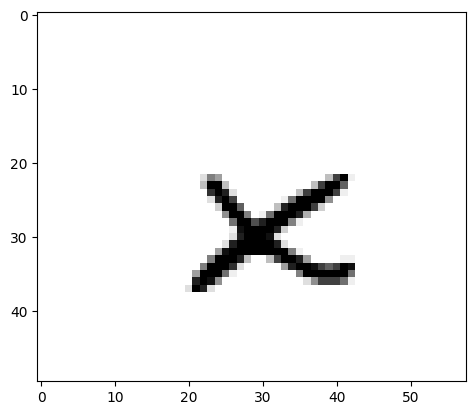

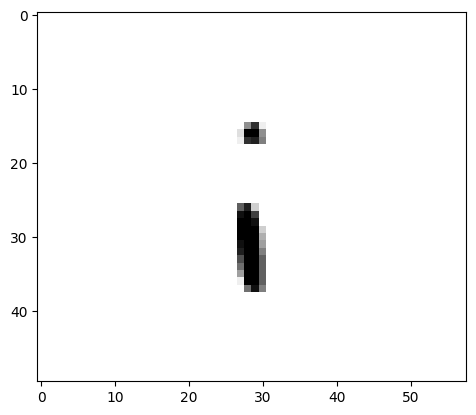

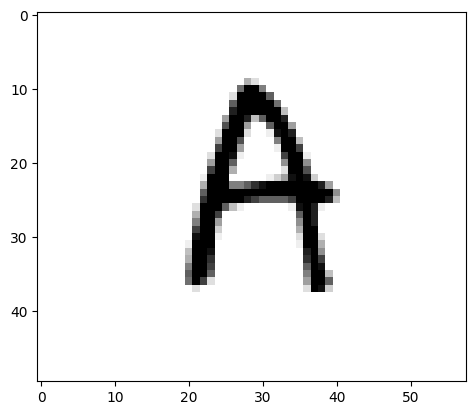

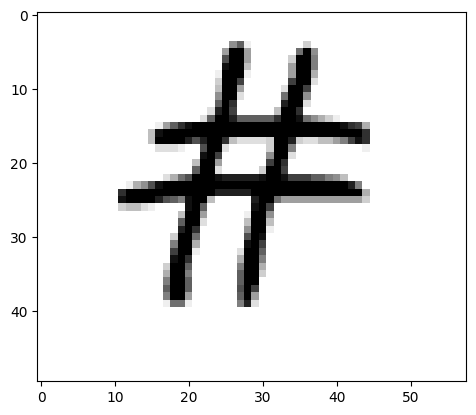

In [5]:
#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train", "SwankyandMooMoo"))):
    img = cv2.imread(os.path.join(image_dir,"train", "SwankyandMooMoo", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

# Custom object classification using YOLO

First install and import

In [6]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/107.7 GB disk)


In [7]:
from ultralytics import YOLO

## Training YOLO

In [8]:
model = YOLO('yolov8n-cls.pt') # pretrained model

100%|██████████| 5.31M/5.31M [00:00<00:00, 47.8MB/s]


The detailed architecture of the model can be seen from:


In [9]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [ ]:
model.train(data=data_dir, epochs=3)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

train: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... 4218 images, 0 corrupt:  45%|████▍     | 4218/9441 [08:51<22:38,  3.84it/s]

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Showing confusion matrix, that is already stored in detect/train folder

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train2/confusion_matrix_normalized.png')

##Prediction

In [ ]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://www.freshpoint.com/wp-content/uploads/2019/08/freshpoint-produce-101-apples-bananas.jpg', save=True)

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict/freshpoint-produce-101-apples-bananas.jpg')